<a href="https://colab.research.google.com/github/jvitordeoliveira96/UFRJ_courses/blob/main/ALA_ICP115/Assignments/ALA_esq_Lab3MinQ2021_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Álgebra Linear Algorítmica 2021.2**

**Professor: João Vitor de Oliveira Silva**

**Laboratório 3**


*Para realizar uma cópia editável deste esqueleto, você pode clicar em Arquivo > Salvar uma cópia no Drive. Você pode remover as células de texto de enunciado e de avisos*, **mas mantendo as células de texto que marcam o início das questões.**

*É fortemente recomendado que o aluno veja o material de apoio ao laboratório 4 disponibilizado no Google Classroom.*


---
###**Avisos**:


*   **Sua solução deve ser devidamente comentada, usando células de texto e/ou códigos desenvolvidos.**
*   **Como já informado, soluções com plágio serão desconsideradas e receberão grau 0.**
*   **O trabalho pode ser feito individualmente ou em dupla.**

* **O nome do seu arquivo contendo a solução deve ser**
$$\mathtt{nome\_DRE\_lab03.ipynb}$$ ou $$\mathtt{nome1\_DRE\_nome2\_DRE2\_lab03.ipynb}$$
 **e deve ser submetido na atividade presente no Google Classroom até as 23:59 do dia 01/10.**


In [ ]:
import sympy as sym
import numpy as np
from IPython.display import display, Markdown, Latex, HTML
import scipy as sp
import scipy.linalg
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from google.colab import files
import pandas as pd



In [ ]:
#@title Funções que realizam eliminação Gaussiana (sem subs reversa)

def permutation_check(A_aug, l, c):
  for k in range(l+1, A_aug.shape[0]):
    if (A_aug[k, c] != 0):
      return k
    
  return -1


def gaussian_elimination(A, b = None, show_steps = True, save_iters = False):
  """ Computes Gaussian elimination (row echoleon form), showing step by step. 
  Sympy Matrix, Sympy Matrix -> Sympy Matrix """

  if (b == None):
    A_aug = A.copy()
  else:
    A_aug = A.col_insert(A.shape[1], b)

  if (save_iters):
    A_aug_iters = []
    A_aug_iters.append(A_aug.copy())
  
  if (show_steps):
    print('\033[1mInício\033[0m')
    print('--------------------------------------')
    display(A_aug)
    print('\n')
    print('--------------------------------------')

  el = 0
  for j in range(0, A.shape[1]):
    pivot_in_column = False

    if (A_aug[el,j] == 0):
      if (show_steps):
        print('Atenção: pivô zero em A[{0}, {1}]!'. format(el, j) )
        display(A_aug)
      
      l = permutation_check(A_aug, el, j)
      if ( l !=-1 ):
        A_aug[l, :], A_aug[el, :] = A_aug[el, :], A_aug[l, :]
        if (show_steps):
          print('Permutação L{0} <-> L{1}'.format(l, el))
          display(A_aug)
        pivot_in_column = True
        if (save_iters):
          A_aug_iters.append(A_aug.copy())

    else:
      pivot_in_column = True
    
    if ( pivot_in_column ):
      for i in range(el+1, A_aug.shape[0]):
        c = - A_aug[i, j] / A_aug[el, j] 
        A_aug[i, :] = A_aug[i, :] + c * A_aug[el, :]
        if (show_steps):
          print('L{0} <- L{0} + ({2}) * L{1}'.format(i, el, c))
          display(A_aug)
          print('\n')
        if (save_iters):
          A_aug_iters.append(A_aug.copy())
      
      el = (el + 1) if (el + 1 < A_aug.shape[0] ) else el 
      if (show_steps):  
        print('--------------------------------------')

  if (show_steps):
    print('\033[1mFim\033[0m')
  
  if (save_iters):
    return A_aug_iters
  else:
    return A_aug





In [ ]:
#@title Funções que retornam espaço nulo e espaço de colunas de uma matriz

def show_nullspace_basis(A):
  """ Receives matrix and presents linear transform nullspace basis using Sympy Matrix 
  method nullspace.

  Sympy Matrix-> None """

  A_null = A.nullspace()
  latex_output = "\\left\\{"

  for v in A_null:
    latex_output += sym.latex(v) + ", "
  if (latex_output[-2] ==","):
    latex_output = latex_output[:-2]

  latex_output += "\\right\\}"

  display(Latex(latex_output))

def show_cspace_basis(A):
  """ Receives matrix and presents linear transform image basis using Sympy Matrix 
  method columnspace.

  Sympy Matrix-> None """

  A_col = A.columnspace()
  latex_output = "\\left\\{"

  for v in A_col:
    latex_output += sym.latex(v) + ", "
  if (latex_output[-2] ==","):
    latex_output = latex_output[:-2]

  latex_output += "\\right\\}"

  display(Latex(latex_output))






#Interpolação

O problema de interpolação é um problema bastante comum em diversas áreas da ciência. Dado um conjunto discreto de pontos

$$\{(x_0, y_0), (x_1, y_1),\ldots, (x_n, y_n) \}$$

deseja-se encontrar uma função $p(x)$ tal que $ p(x_i) = y_i$.

O exemplo mais simples de interpolação é determinar uma reta que passa por dois pontos. Considere o caso em que deseja-se achar uma reta que passe pelo par de pontos $\{(0,1), (1,2)\}$. Sabemos que uma reta é dada por

$$p(x) = \beta_0 x + \beta_1, $$

em que os coeficientes $\beta_0$ e $\beta_1$ são o coeficiente angular e linear da reta, respectivamente. Para encontrar a reta que passa pelo par de pontos de interesse, é possível construir um sistema linear usando que $p(x_i) = y_i$:

$$\begin{align*}
\begin{cases}
\beta_0.0 + \beta_1 = 1 \\
\beta_0.1 + \beta_1 = 2
\end{cases} \to \underbrace{\begin{bmatrix} 0 & 1 \\ 1 & 1  \end{bmatrix}}_{A}\underbrace{\begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix}}_{x} = \underbrace{\begin{bmatrix}  1 \\ 2 \end{bmatrix}}_{b}
\end{align*}$$

Resolvendo este sistema linear, concluímos que $\beta_0 = 1$ e $\beta_1 = 1$. Vejamos a seguir um código em Python que constrói/resolve o sistema linear e "plota" a reta encontrada:

In [ ]:
# Atribuição de pontos (x, y)
x, y = sym.Matrix([0, 1]), sym.Matrix([1, 2])

In [ ]:
# Construção do sistema linear
# matriz A
A = sym.Matrix([[0, 1], [1, 1]])
A

Matrix([
[0, 1],
[1, 1]])

In [ ]:
# vetor b
b = y
b

Matrix([
[1],
[2]])

In [ ]:
# Resolução do sistema linear
gaussian_elimination(A, b)
beta_s = sym.symbols('beta_0 beta_1')
X = sym.Matrix(beta_s)
solution = sym.linsolve((A,b)) 
solution = solution if len(solution)==0 else list(solution)[0]

Início
--------------------------------------


Matrix([
[0, 1, 1],
[1, 1, 2]])



--------------------------------------
Atenção: pivô zero em A[0, 0]!


Matrix([
[0, 1, 1],
[1, 1, 2]])

Permutação L1 <-> L0


Matrix([
[1, 1, 2],
[0, 1, 1]])

L1 <- L1 + (0) * L0


Matrix([
[1, 1, 2],
[0, 1, 1]])



--------------------------------------
--------------------------------------
Fim


In [ ]:
solution

(1, 1)

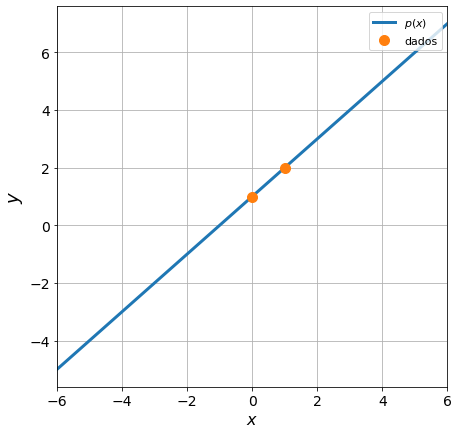

In [ ]:
# Realizando plot 
# Convertendo respostas para numpy
x_num, y_num = np.array(x).astype(float).flatten(), np.array(y).astype(float).flatten() 
beta_num = np.array(solution).astype(float).flatten()

# Gerando a malha (grid)
x_min, x_max = -6, 6
x_grid = np.linspace(x_min, x_max, 80)

# Calculando o valor da função (no caso, a reta) nesta malha (grid) gerada
p_grid = beta_num[0] * x_grid + beta_num[1]

# Instruções do plot
fig, ax = plt.subplots(figsize = (7,7))
ax.plot(x_grid, p_grid, linewidth = 3) # reta
ax.plot(x_num, y_num, linestyle = "None", marker = 'o', markersize = 10) # pontos do conjunto de dados

# Labels nos eixos, limites do plot e legenda
ax.set_xlabel("$x$", size = 16)
ax.set_ylabel("$y$", size = 18)
ax.set_xlim(x_min, x_max)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(["$p(x)$", "dados"], loc = "upper right", fontsize = 11)
ax.grid(True)

plt.show()

In [ ]:
# Mostrar uma base para espaço de colunas da matriz A do sistema Ax=b
# será útil para certas questões 
show_cspace_basis(A)

<IPython.core.display.Latex object>

In [ ]:
# Mostrar uma base para o espaço nulo A do sistema Ax=b
# será útil para certas questões 
show_nullspace_basis(A)
# neste caso, o núcleo é trivial (apenas o vetor nulo é levado no vetor nulo)

<IPython.core.display.Latex object>

In [ ]:
# Mostrar vetor b. Neste caso, o vetor b pertence ao espaço de colunas 
# (que coincide com todo o R^2). 
# Como espaço nulo é trivial b é expresso como Comb. linear das colunas unicamente 
# como b = 1 (0,1) + 1 (1,1).
b

Matrix([
[1],
[2]])

Perceba que a mesma abordagem poderia ser utilizada se a função escolhida fosse:

- Uma parábola: $p(x) = \beta_0 x^2 + \beta_1 x + \beta_2$
- Um polinômio de grau 3: $p(x) = \beta_0 x^3 + \beta_1 x^2 + \beta_2 x + \beta_3 $


e por aí vai.


Sobre o problema de interpolação apresentado, responda:

#Questão 1

(a) Existe uma reta $p(x) = \beta_0 x + \beta_1$ que passa pelo conjunto de pontos $\{(1, 3), (4,5)\}$? Se existir, determine quem seria a reta e mostre seu gráfico junto com o conjunto de pontos informado.

R:

(b) Considere $A$ e $b$ do sistema construído no item (a).  Relacione sua resposta anterior com o espaço nulo e o espaço de colunas $A$.




In [ ]:
show_cspace_basis(A)

In [ ]:
show_nullspace_basis(A)

In [ ]:
b

R: 

# Questão 2

(a) Existe uma reta $p(x) = \beta_0 x + \beta_1$ que passa pelo conjunto de pontos $\{(1, 3), (1,5)\}$? Se existir, determine quem seria a reta e mostre seu gráfico junto com o conjunto de pontos informado.


R:

(b) Considere $A$ e $b$ do sistema construído no item (a).  Relacione sua resposta anterior com o espaço nulo e o espaço de colunas $A$.



In [ ]:
show_cspace_basis(A)

In [ ]:
show_nullspace_basis(A)

In [ ]:
b

R: 

## Questão 3

(a) Existe uma reta $p(x) = \beta_0 x + \beta_1$ que passa pelo conjunto de pontos $\{(1, 3), (4,5), (2,4)\}$? Se existir, determine quem seria a reta e mostre seu gráfico junto com o conjunto de pontos informado.


R: 

(b) Considere $A$ e $b$ do sistema construído no item (a).  Relacione sua resposta anterior com o espaço nulo e o espaço de colunas $A$.



In [ ]:
show_cspace_basis(A)

In [ ]:
show_nullspace_basis(A)

In [ ]:
b

R: 

## Questão 4

(a) Existe uma parábola $p(x) = \beta_0 x^2 + \beta_1 x + \beta_2$ que passa pelo conjunto de pontos $\{(1, 3), (4,5)\}$? Se existir, determine quem seria a parábola e mostre seu gráfico junto com o conjunto de pontos informado.


R: 

(b) Considere $A$ e $b$ do sistema construído no item (a).  Relacione sua resposta anterior com o espaço nulo e o espaço de colunas $A$.


In [ ]:
show_cspace_basis(A)

In [ ]:
show_nullspace_basis(A)

In [ ]:
b

R: 

## Questão 5

(a) Existe uma parábola $p(x) = \beta_0 x^2 + \beta_1 x + \beta_2$ que passa pelo conjunto de pontos $\{(1, 3), (4,5), (6, 0)\}$? Se existir, determine quem seria a parábola e mostre seu gráfico junto com o conjunto de pontos informado.


R: 

(b) Considere $A$ e $b$ do sistema construído no item (a).  Relacione sua resposta anterior com o espaço nulo e o espaço de colunas $A$.


In [ ]:
show_cspace_basis(A)

## Questão 6

(a) Existe uma parábola $p(x) = \beta_0 x^2 + \beta_1 x + \beta_2$ que passa pelo conjunto de pontos $\{(1, 1), (2,2), (3, 3)\}$? Se existir, determine quem seria a parábola e mostre seu gráfico junto com o conjunto de pontos informado.


R: 

(b) Considere $A$ e $b$ do sistema construído no item (a).  Relacione sua resposta anterior com o espaço nulo e o espaço de colunas $A$.


In [ ]:
show_cspace_basis(A)

In [ ]:
show_nullspace_basis(A)

In [ ]:
b

R: 

## Questão 7

(a) Existe uma parábola $p(x) = \beta_0 x^2 + \beta_1 x + \beta_2$ que passa pelo conjunto de pontos $\{(0, 0), (1,1), (2, 4), (-3, 0)\}$? Se existir, determine quem seria a parábola e mostre seu gráfico junto com o conjunto de pontos informado.


R: 

(b) Considere $A$ e $b$ do sistema construído no item (a).  Relacione sua resposta anterior com o espaço nulo e o espaço de colunas $A$.


In [ ]:
show_cspace_basis(A)

In [ ]:
show_nullspace_basis(A)

In [ ]:
b

R: 

##  Questão 8

(a) Existe uma parábola $p(x) = \beta_0 x^2 + \beta_1 x + \beta_2$ que passa pelo conjunto de pontos $\{(0, 0), (-2,4), (2, 4), (3, 9), (-3, 9)\}$? Se existir, determine quem seria a parábola e mostre seu gráfico junto com o conjunto de pontos informado.


R: 

(b) Considere $A$ e $b$ do sistema construído no item (a).  Relacione sua resposta anterior com o espaço nulo e o espaço de colunas $A$.


R: 

## Questão 9

(a) Existe uma cúbica $p(x) = \beta_0 x^3 + \beta_1 x^2 + \beta_2 x + \beta_3$ que passa pelo conjunto de pontos $\{(0, 0), (1,1), (2, 4), (3, 12)\}$? Se existir, determine quem seria a cúbica e mostre seu gráfico junto com o conjunto de pontos informado.


R: 

(b) Considere $A$ e $b$ do sistema construído no item (a).  Relacione sua resposta anterior com o espaço nulo e o espaço de colunas $A$.


R: 

# Regressão

O problema de regressão também é um problema bastante comum em diversas áreas, mais recentemente em aprendizado de máquina. Dado um conjunto discreto de pontos

$$\{(x_0, y_0), (x_1, y_1),\ldots, (x_n, y_n) \}$$

deseja-se encontrar a melhor função $p(x)$ tal que $ p(x_i) \approx y_i$ de acordo com algum critério de "proximidade". Aqui, o critério utilizado será a dos mínimos quadrados.

Por exemplo, se tivéssemos o conjunto de pontos $\{(0, 0), (1, 1), (2,3)\}$ e fosse de interesse encontrar a melhor reta de forma $p(x) = \beta_0x + \beta_1$ que passe por estes pontos. Iríamos construir um sistema linear

$$\begin{align*}
\begin{cases}
\beta_0 \cdot 0 + \beta_1 = 0 \\
\beta_0 \cdot 1 + \beta_1 = 1 \\
\beta_0 \cdot 2 + \beta_1 = 3 \\
\end{cases} \to \underbrace{\begin{bmatrix} 0 & 1 \\ 1 & 1 \\ 2 & 1 \end{bmatrix}}_{A}\underbrace{\begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix}}_{x} = \underbrace{\begin{bmatrix} 0 \\ 1 \\ 3 \end{bmatrix}}_{b}
\end{align*}
$$
que acreditamos não ter solução.  Ao se construir o sistema a partir de de suas equações normais e resolvê-lo, chegamos na solução aproximada

$$\beta_0 = \frac{3}{2}, \quad \beta_1 = -\frac{1}{6}.$$


Sobre o problema de regresão, pede-se que faça:

## Questão 10

(a) Determine a melhor reta (no sentído dos mínimos quadrados) de forma $p(x) = \beta_0 x + \beta_1$ que se aproxima do conjunto de pontos $\{(1, 3), (4,5), (2,4)\}$. Mostre seu gráfico junto com o conjunto de pontos informado. **Sua resolução deve apresentar quem seriam as equações normais.**

*Dica: $A^t v$ em código pode ser obtido fazendo* **` A.T @ v `** *sendo* **`A`** *e* **`v`** *Sympy Matrix/Numpy array de dimensões compatíveis.*


R: 

## Questão 11

(a) Determine a melhor reta (no sentído dos mínimos quadrados) de forma $p(x) = \beta_0 x + \beta_1$ que se aproxima do conjunto de pontos $\{(1, 3), (4,5)\}$. Mostreu seu gráfico junto com o conjunto de pontos informado. **Sua resolução deve apresentar quem seriam as equações normais.**


R: 

(b) Houve alguma diferença do resultado encontrado na **questão 1**? Justifique sua resposta usando conceitos vistos em nosso curso que achar apropriado (subespaço, combinação linear, espaço de colunas,  etc).

## Questão 12

(a) Determine a melhor parábola (no sentído dos mínimos quadrados) de forma $p(x) = \beta_0 x^2 + \beta_1x + \beta_2$ que se aproxima do conjunto de pontos $\{(0, 0), (1,1), (2, 4), (3, 12), (-1,-2)\}$. Mostre seu gráfico junto com o conjunto de pontos informado. **Sua resolução deve apresentar quem seriam as equações normais.**


R: 

## Questão 13: 


Um professor em outro país sempre faz chamada nos cursos que leciona. O mesmo coloca a situação diretamente após o fim das aulas em uma planilha em seu computador. Ele desejava entender o que influenciava na proporção de alunos que iam as aulas, e escolheu as seguintes *features*:


 - $x_0$ é o dia da semana, partindo de segunda como número 1 até sexta como número 5.
 - $x_1$ é a semana do curso, partindo da primeira como $1$ até a última como $20$.
 - $x_2$ é o horário em que foi feita a chamada, partindo de $8$ da manhã como $8$, até $16h$ como 16.
 - $x_3 = \text{Max}(T-27,0)$, onde $T$ é a temperatura exterior (então $x_3$ é o número de graus acima de 27$^\circ$ C).
 - $x_4 = \text{Max}(10-T,0)$, onde $T$ é a temperatura exterior (então $x_4$ é o número de graus abaixo de 10$^\circ$ C)


O professor formulou um modelo linear em função destas features da forma

$$ h(x_0, x_1, x_2, x_3, x_4) = \beta_0x_0 + \beta_1 x_1 + \beta_2x_2 + \beta_3x_3 +\beta_4x_4 + \beta_5$$
onde $h$ é a previsão da proporção de alunos (0 a 100%) que atenderá a aula baseado nas *features*.




### Link de table_class.csv: [Download](https://drive.google.com/file/d/1TxAkd4R1tHSnuohpzfHCC4mjuHLYW1Mq/view?usp=sharing)
### e lógica para upload do arquivo



In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  dataset2f = pd.read_csv(fn, sep=',',header=None)

Saving table_class_d.csv to table_class_d (1).csv
User uploaded file "table_class_d.csv" with length 2267 bytes


In [ ]:
#@title Visualizacao da tabela
dataset2f

,0,1,2,3,4
0,Day (1-5),Week (1-20),Hour (8-16),Temperature (ºC),Attendance (%)
1,2.00,1.00,12.00,0.51,64.00
2,4.00,2.00,12.00,5.01,65.00
3,3.00,2.00,13.00,0.24,63.00
4,2.00,3.00,15.00,-6.51,61.00
5,3.00,3.00,11.00,-7.11,55.00
6,2.00,4.00,10.00,-0.50,60.00
7,1.00,5.00,8.00,-6.51,54.00
8,5.00,5.00,13.00,8.94,68.00
9,5.00,5.00,9.00,9.76,64.00


In [ ]:
# Conversao para Numpy Array
dataset = dataset2f.values[1:].astype(float)
h_num = dataset[:, 4]
# Dica: dataset[:, i] -> retorna i-ésima coluna

a) Auxilie este professor e realize uma regressão linear (por meio de mínimos quadrados), ou seja, obtenha os coeficientes $\beta_i, \quad 0 \leq i \leq 5$. 

*Nesta questão, sugere-se o uso apenas de Numpy arrays e funções da biblioteca Numpy, tendo em vista que os dados são numéricos e aproximados. As funções abaixo podem ser úteis:*

 - **`np.linalg.solve(A, b)`**: retorna solução $v$ de um sistema linear $Av = b$ com Numpy arrays $A$ e $b$ sendo uma matriz quadrada e um vetor de dimensões compatíveis, respectivamente.
 - **`np.maximum(v, w)`**: retorna um terceiro vetor $s$ em que sua i-ésima componente é dada por $s_i = \text{Max}(v_i, w_i)$.

R:

b) Dê uma interpretação breve sobre os coeficientes (pesos) $\beta_i, \quad 0 \leq i \leq 5$ obtidos no item anterior. Espera-se que relacione como cada uma das *features* influencia na proporção de alunos em sala de aula.

R: 

c) Estime qual seria a proporção de alunos em uma aula que:

 - ocorreu uma sexta-feira da semana 15;
 - a chamada foi feita as 16h;
 - a temperatura externa estava em torno de 26 graus celsius;

R: 